In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import datetime as dt
import seaborn as sns
import seaborn.objects as so

# Attempt #2 of Temperature Prediction
Trying to predict daily weather forecast for 2024 using older data. Hoping to include more years of data to help.

Concating the two csv files into a new csv file from 01/01/2010 - 04/06/2024. <br>
Converting precip 'T' to 0.005 as a way to numerically show a trace amount. 'T' represented any value less than 0.01.

## Organizing and Extracting Information

**df1** = DataDowloadCSV.csv <br>
**df2** = DatadowloadCSV2020.csv <br>
**df3** = concat(DataDowloadCSV.csv, DatadowloadCSV2020.csv) <br>
**df4** = *df3*, replacing "T" (trace amount) with 0.005. Numerical representation to show a trace amount <br>
**df5** = *df4*, extracting new columns: 'Month', 'DayofMonth', 'Year', 'DayofYear'

cumulativeData.csv is current manipulation saved.

In [13]:
#Handling data
##Combining the two CSV files
df1 = pd.read_csv('DataDowloadCSV.csv')
df2 = pd.read_csv('DataDowloadCSV2020.csv')
df3 = pd.concat([df1, df2], ignore_index= True)

##Replacing 'T' with numerical value
df4 = df3.replace('T', 0.005)

In [ ]:
#Saving df4(Concated Dataframes, replacing 'T' with number)
df4.to_csv('cumulativeData', index= False)

In [26]:
#Converting snow/snow depth to numeric
#Finding the max value for 'Snow Depth'
df4['Snow Depth (inches)'] = pd.to_numeric(df4['Snow Depth (inches)'])
maxsnowdepth = df4['Snow Depth (inches)'].max()

df4['Snow (inches)'] = pd.to_numeric(df4['Snow (inches)'])
maxsnow = df4['Snow (inches)'].max()
maxsnow

df4.describe()

,Maximum Temperature degrees (F),Minimum Temperature degrees (F),Snow (inches),Snow Depth (inches)
count,5210.000000,5210.000000,5210.000000,5210.000000
mean,55.929750,38.929750,0.152087,1.534237
std,24.030602,22.191985,0.804070,3.438969
min,-13.000000,-28.000000,0.000000,0.000000
25%,36.000000,23.000000,0.000000,0.000000
50%,58.000000,40.000000,0.000000,0.000000
75%,78.000000,59.000000,0.000000,1.000000
max,103.000000,81.000000,16.300000,24.000000


In [ ]:
#Correlation of data
df4['Date'] = pd.to_datetime(df4['Date'])
df4.corr()

In [32]:
#Creating 'Month', 'DayofMonth', and 'Year' for better data analysis
df4['Month'] = df4['Date'].dt.month
df4['DayofMonth'] = df4['Date'].dt.day
df4['Year'] = df4['Date'].dt.year

df4.to_csv('cumulativeData.csv', index= False)

In [3]:
#Adding DayofYear, saving to cumulativeData.csv
df5 = pd.read_csv('cumulativeData.csv')
df5['DayofYear'] = df5['Date'].dt.dayofyear
df5.to_csv('cumulativeData.csv', index= False)

In [2]:
#Correlation of df5
df5 = pd.read_csv('cumulativeData.csv')
df5['Date'] = pd.to_datetime(df5['Date'])
df5.corr()

,Date,Daily High (F),Daily Low (F),Precipitation (inches),Snow (inches),Snow Depth (inches),Month,DayofMonth,Year,DayofYear
Date,1.000000,-0.002480,-0.000405,-0.015438,0.011542,-0.061422,0.028184,0.003531,0.997514,0.028335
Daily High (F),-0.002480,1.000000,0.961746,0.109238,-0.215100,-0.567676,0.235083,0.003687,-0.018798,0.231540
Daily Low (F),-0.000405,0.961746,1.000000,0.165861,-0.193272,-0.580129,0.270045,0.013360,-0.019232,0.267126
Precipitation (inches),-0.015438,0.109238,0.165861,1.000000,0.200511,-0.073603,0.021324,0.030250,-0.017064,0.023195
Snow (inches),0.011542,-0.215100,-0.193272,0.200511,1.000000,0.183008,-0.055225,0.001677,0.015357,-0.054201
Snow Depth (inches),-0.061422,-0.567676,-0.580129,-0.073603,0.183008,1.000000,-0.326644,-0.023746,-0.038471,-0.325282
Month,0.028184,0.235083,0.270045,0.021324,-0.055225,-0.326644,1.000000,0.011693,-0.042085,0.996540
DayofMonth,0.003531,0.003687,0.013360,0.030250,0.001677,-0.023746,0.011693,1.000000,-0.003130,0.094466
Year,0.997514,-0.018798,-0.019232,-0.017064,0.015357,-0.038471,-0.042085,-0.003130,1.000000,-0.042177
DayofYear,0.028335,0.231540,0.267126,0.023195,-0.054201,-0.325282,0.996540,0.094466,-0.042177,1.000000


## Data Visualization

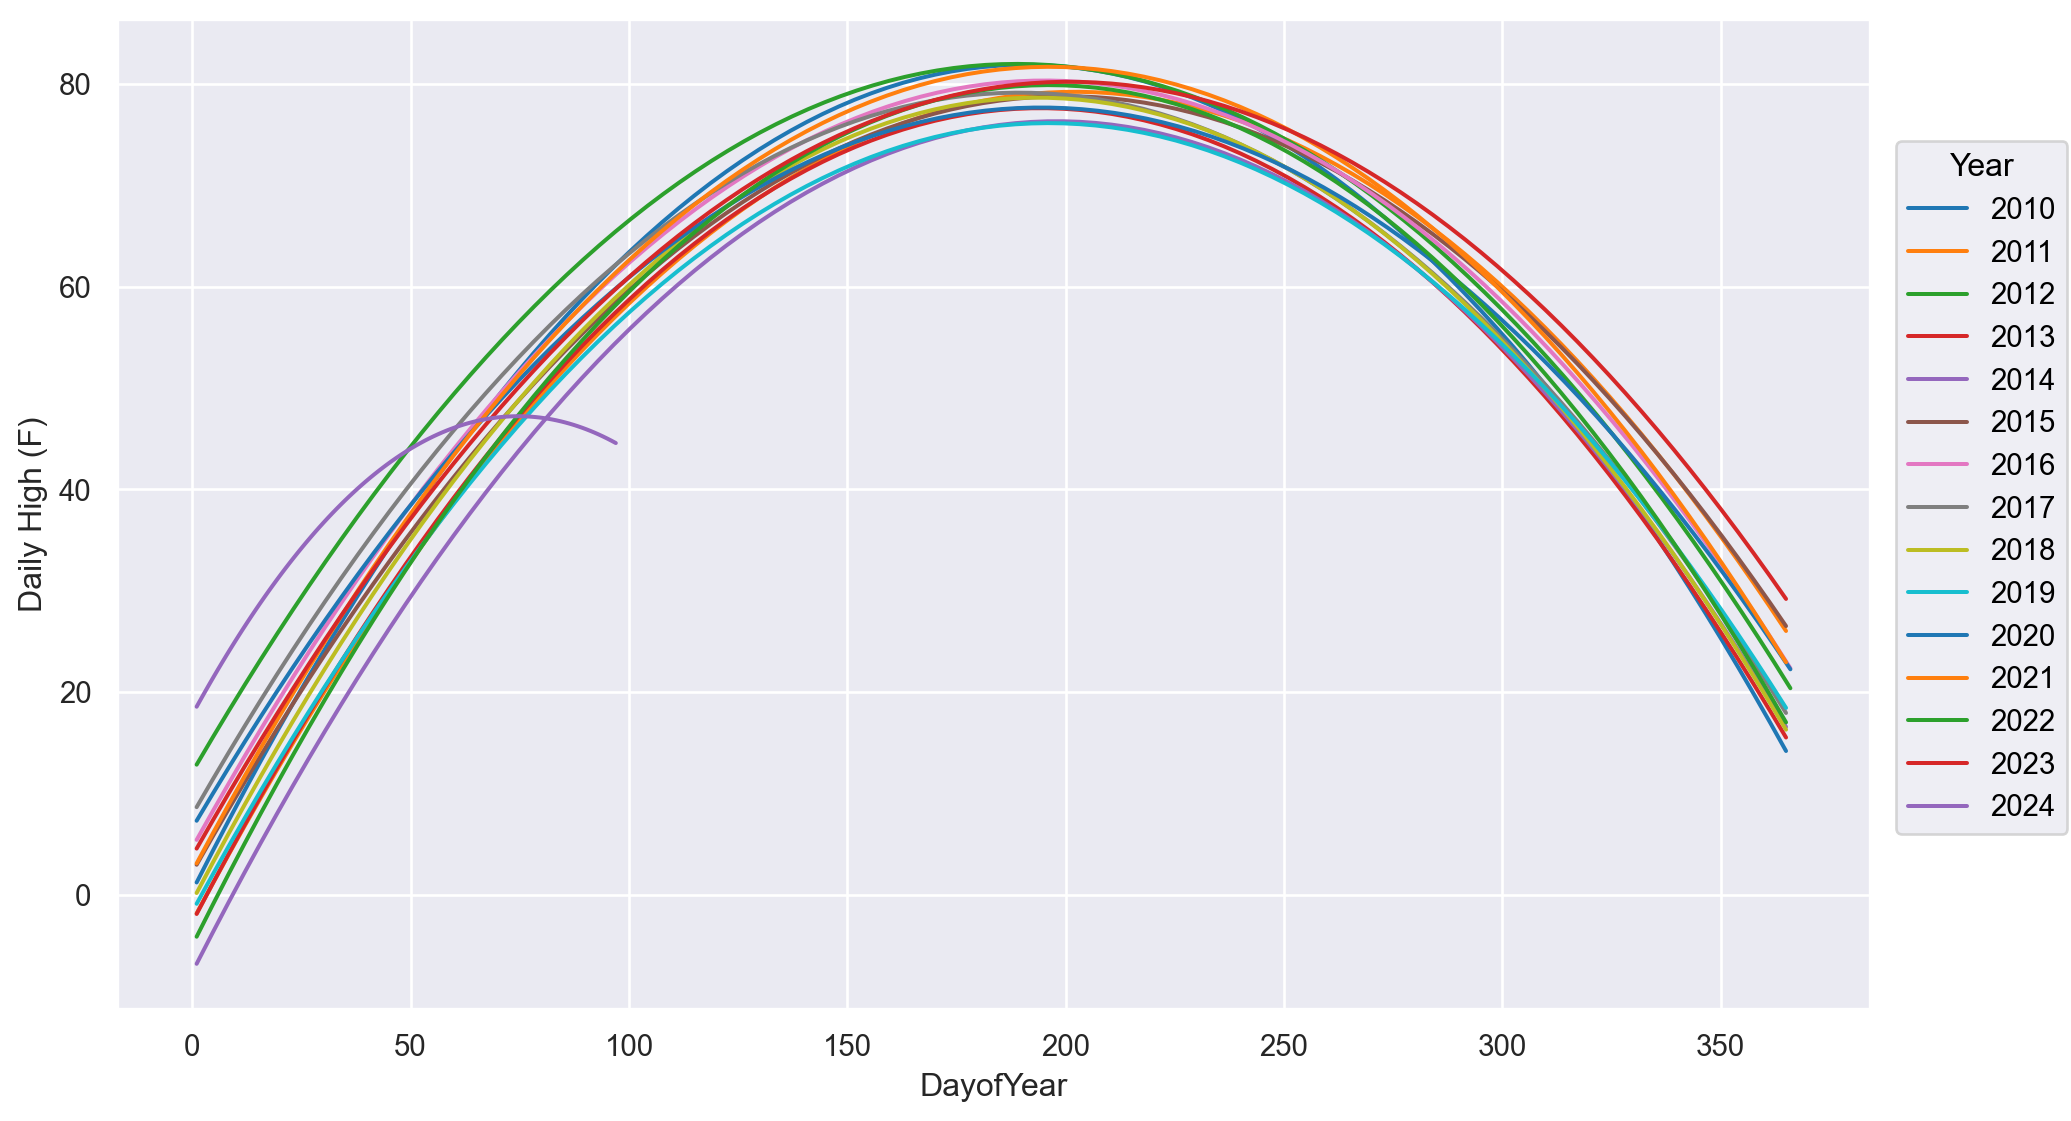

In [25]:
#Visualizing Daily High temps for each year as lines
p1 = (
    so.Plot(df5, x= 'DayofYear', y= 'Daily High (F)', color= 'Year')
    #.add(so.Dots(pointsize= 1))
    .add(so.Line(), so.PolyFit())

    .scale(color= 'tab10')
    .layout(size= (10, 6))
)
p1

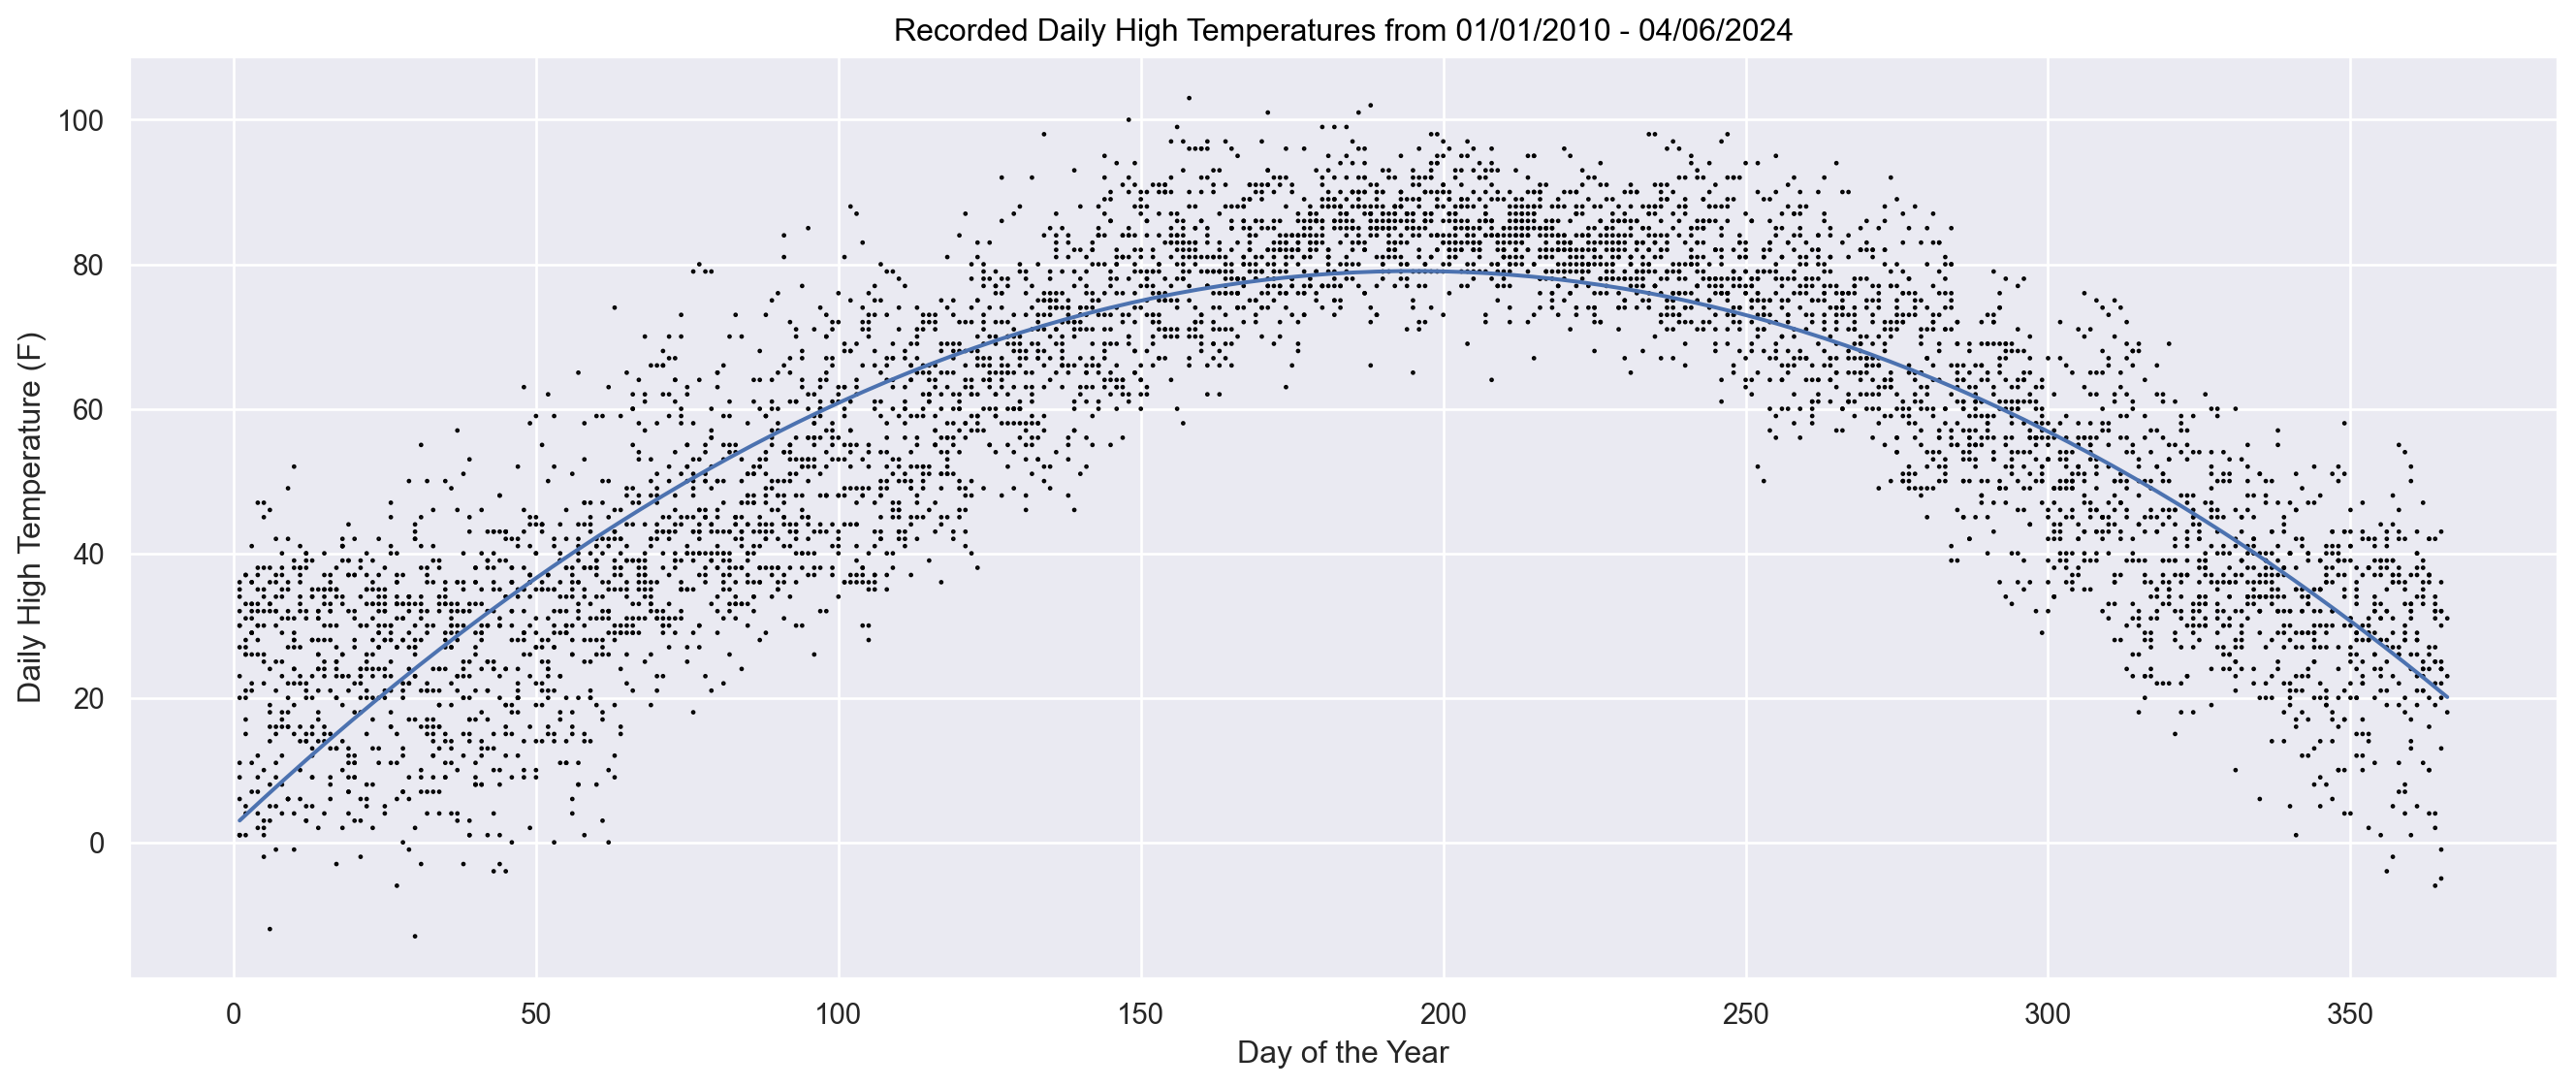

In [3]:
#Visualizing Daily High per year as dots with an Average line
df_2024 = df5[df5['Year'] == 2024]
p2 = (
    so.Plot(df5, x= 'DayofYear', y= 'Daily High (F)')
    #.add(so.Dots(pointsize= 1))
    .add(so.Dots(pointsize= 1, color= 'black'), so.Dodge())
    .add(so.Line(), so.PolyFit())

    .scale(color= 'tab10')
    .layout(size= (14, 6))
)
p2.label(x= 'Day of the Year', y= 'Daily High Temperature (F)', title= 'Recorded Daily High Temperatures from 01/01/2010 - 04/06/2024')


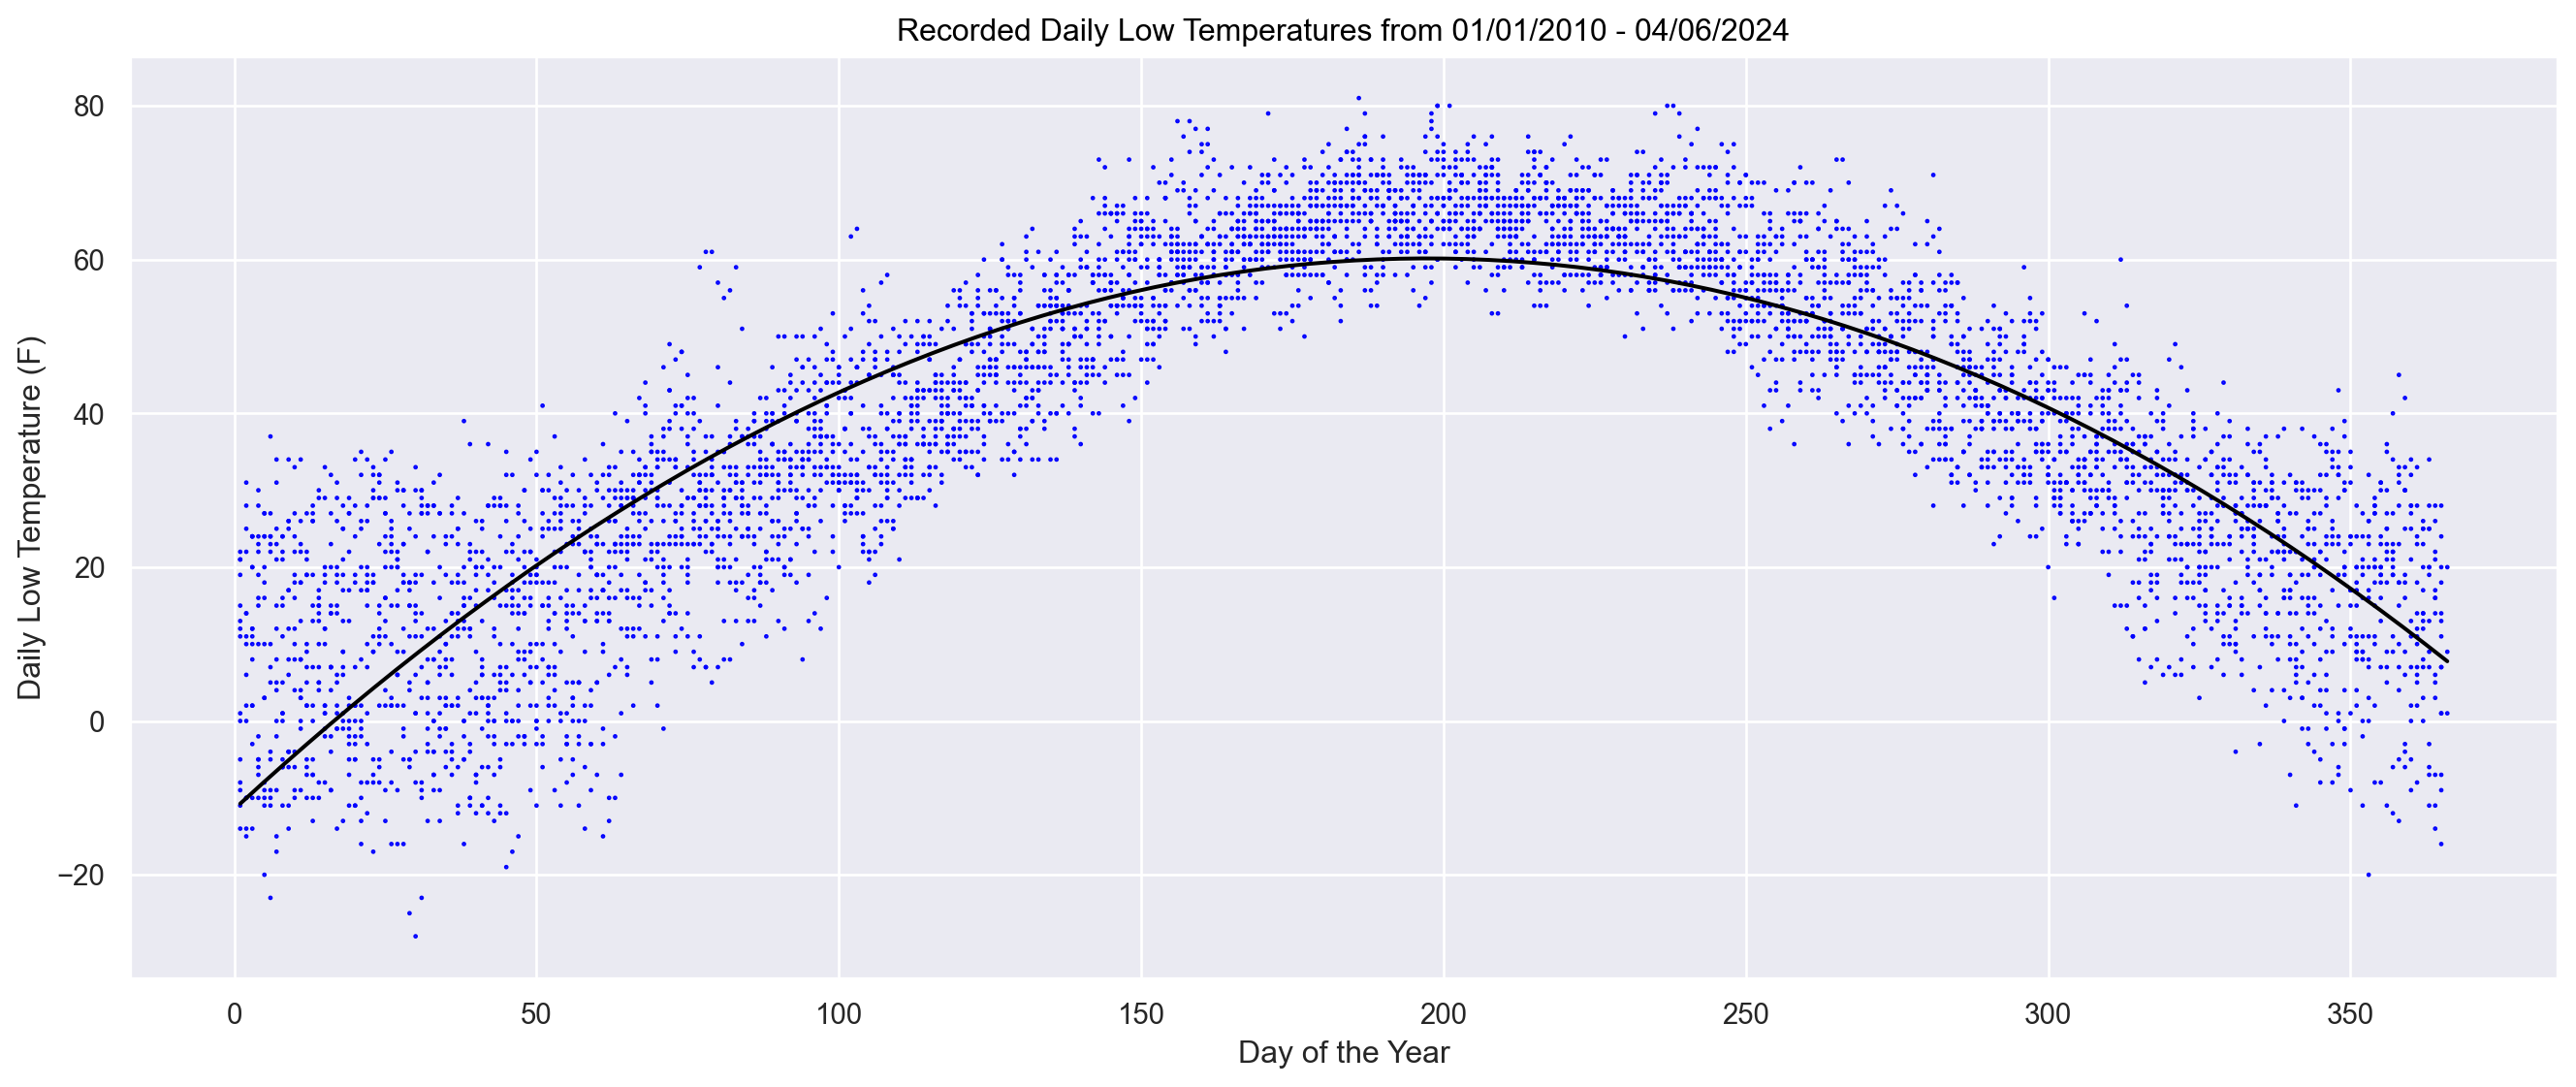

In [4]:
#Visualizing Daily Low per year as dots with an Average line
df_2024 = df5[df5['Year'] == 2024]
p6 = (
    so.Plot(df5, x= 'DayofYear', y= 'Daily Low (F)')
    #.add(so.Dots(pointsize= 1))
    .add(so.Dots(pointsize= 1, color= 'blue'), so.Dodge())
    .add(so.Line(color= 'black'), so.PolyFit())

    .scale(color= 'tab10')
    .layout(size= (14, 6))
)
p6.label(x= 'Day of the Year', y= 'Daily Low Temperature (F)', title= 'Recorded Daily Low Temperatures from 01/01/2010 - 04/06/2024')

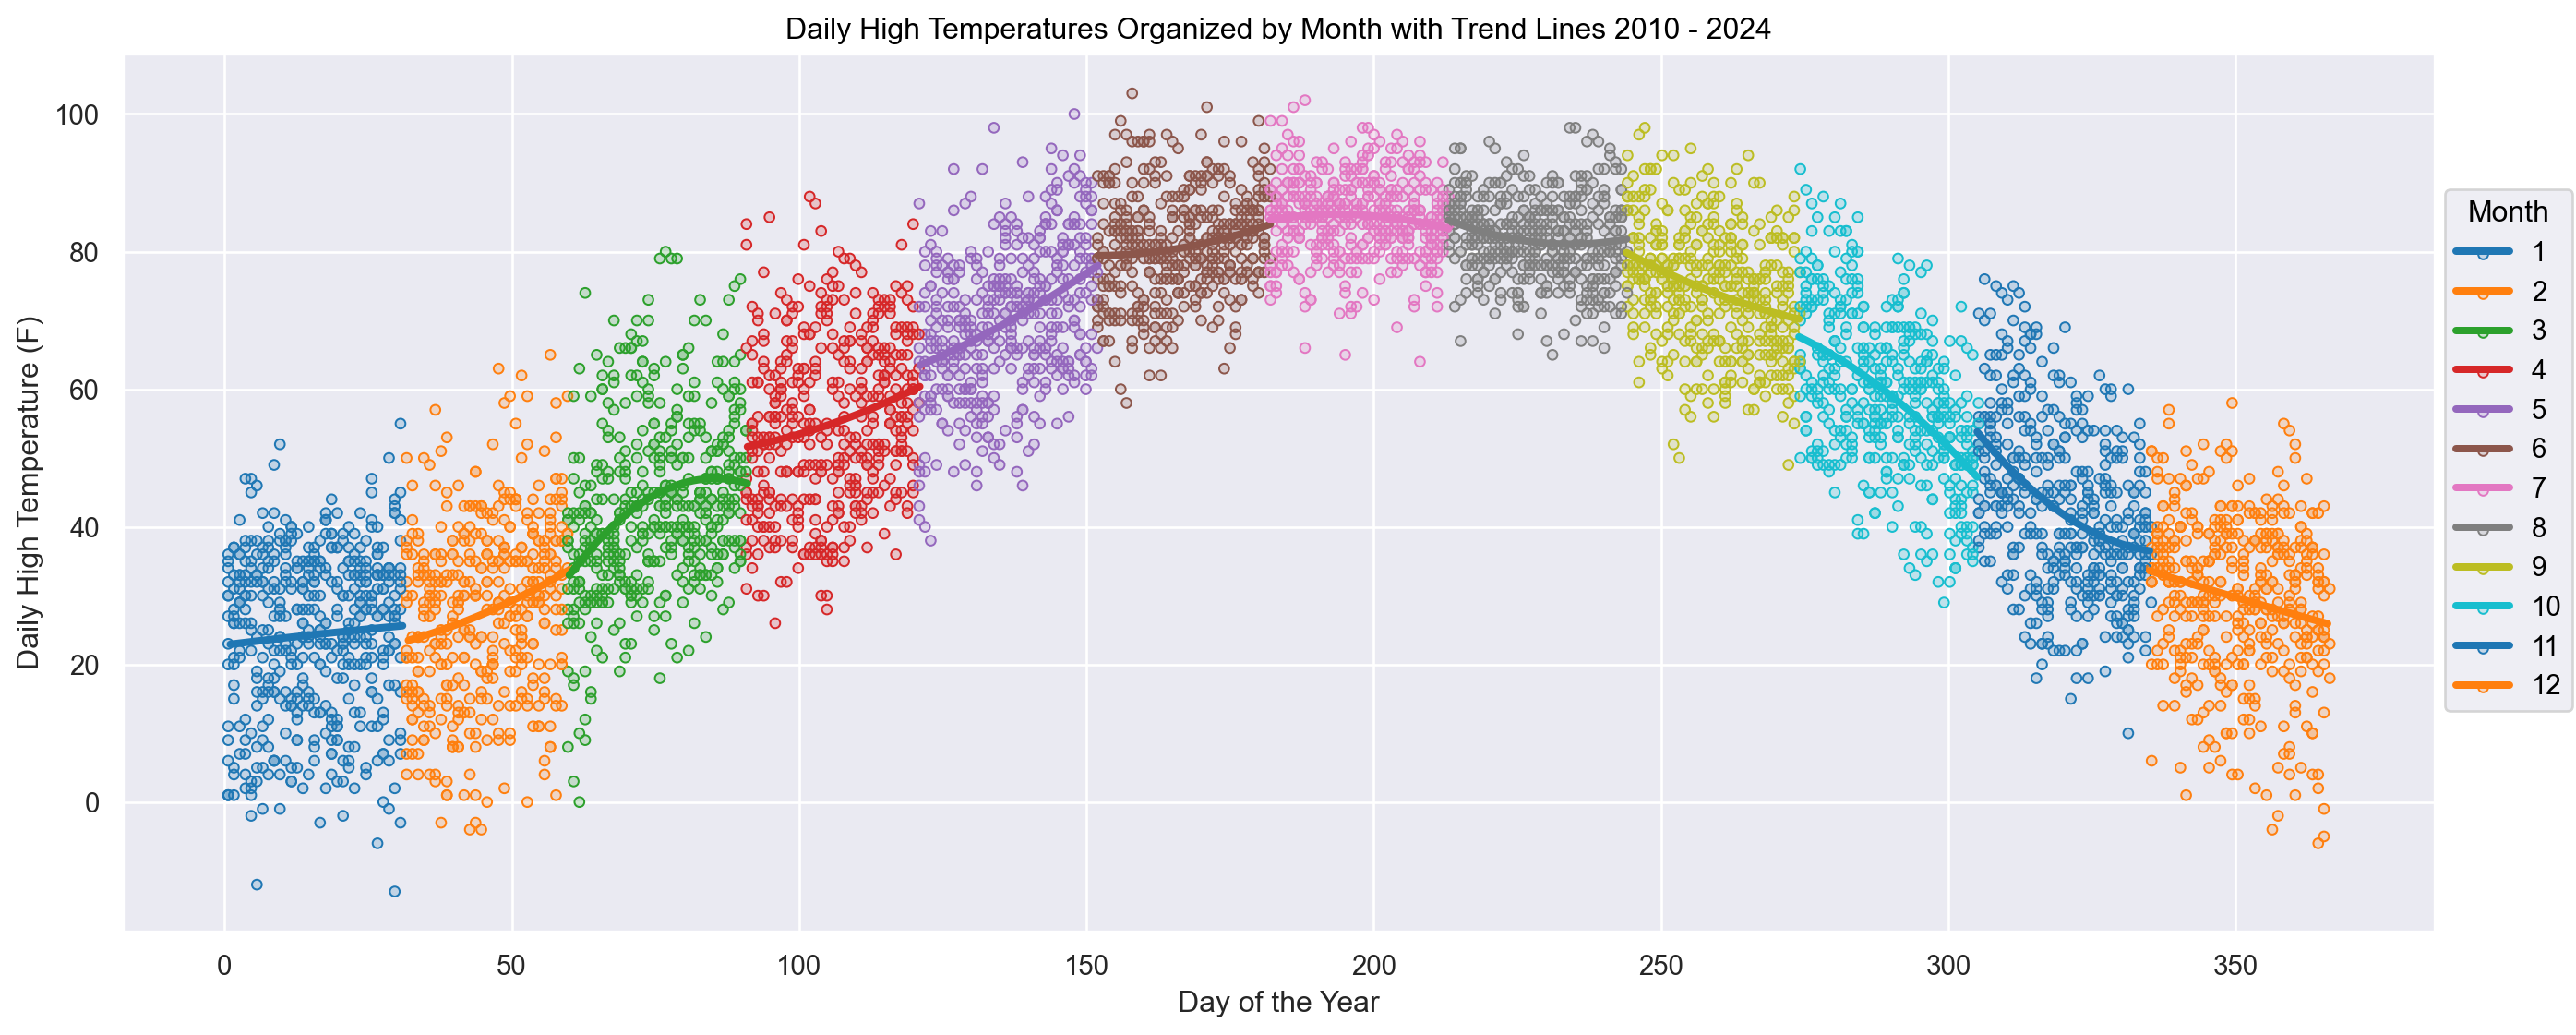

In [15]:
#Max Temp by Month
p3 = (

    so.Plot(df5, x= 'DayofYear', y= 'Daily High (F)', color= 'Month')
    .add(so.Dots(), so.Dodge())
    .add(so.Line(linewidth= 3), so.PolyFit())

    .scale(color= 'tab10')
    .layout(size= (14, 6))
)
p3.label(x= 'Day of the Year', y= 'Daily High Temperature (F)', title= 'Daily High Temperatures Organized by Month with Trend Lines 2010 - 2024')


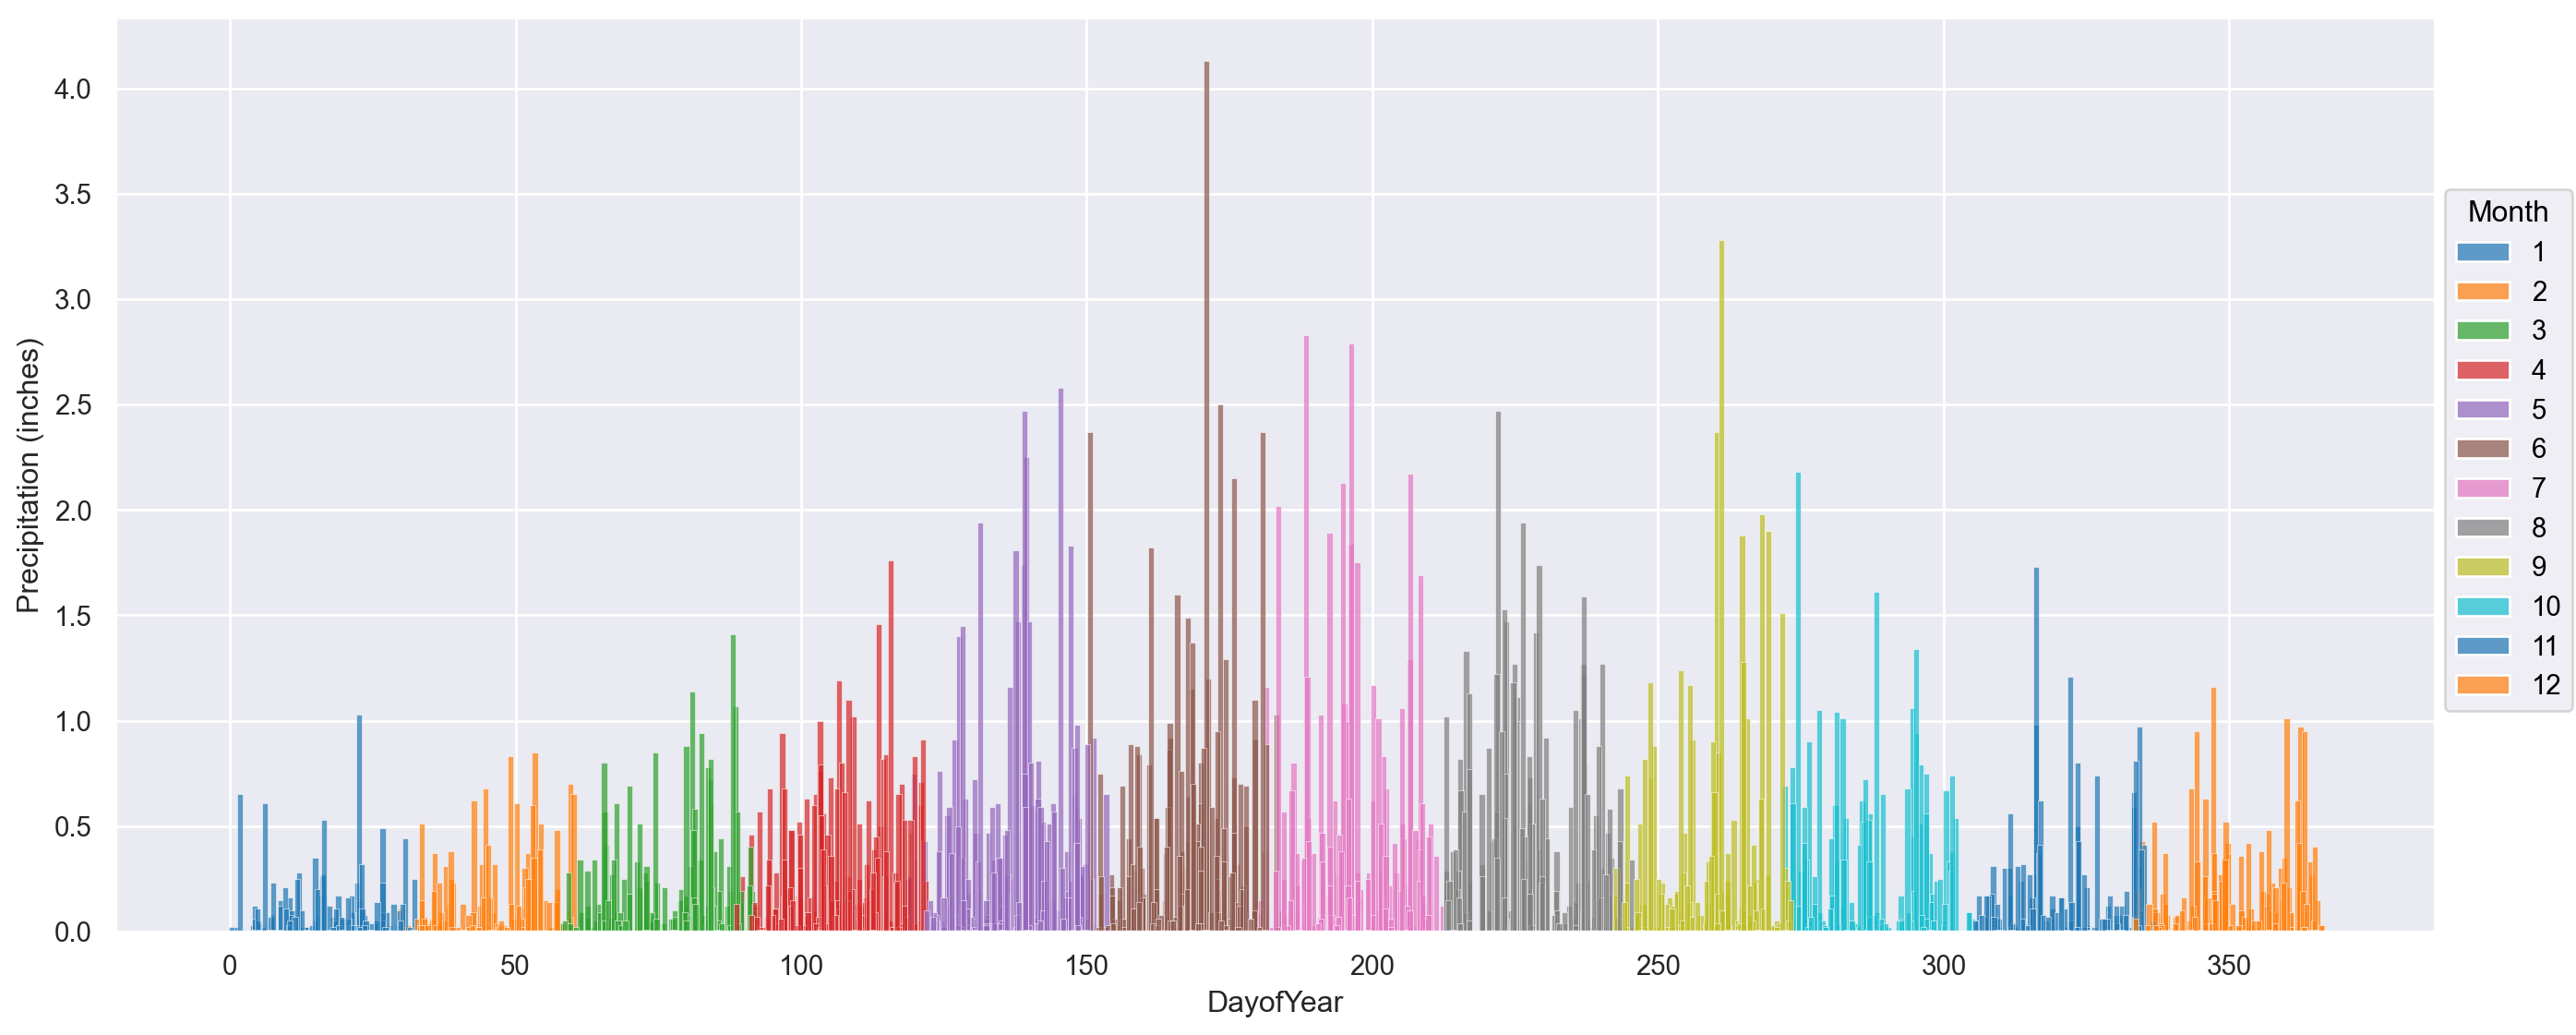

In [32]:
#Daily Precipitation by Month
p4 = (
    so.Plot(df5, x= 'DayofYear', y= 'Precipitation (inches)', color= 'Month')
    .add(so.Bars(), so.Jitter(5))
    .scale(color= 'tab10')
    .layout(size= (14, 6))
)
p4